# **Exploratory Analysis on Lunch Delivery Time Series Data**

## **1. Import data**

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
data_dir = "/home/angps/Documents/Thesis/Data/"
image_dir = "/home/angps/Documents/Thesis/Report/Images/"
df = pd.read_csv(data_dir + "full_df_with_exo.csv")

In [2]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,195,196,197,198,199,200,201,202,203,204
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(852, 204)

**There are 839 locations with the following exogenous variables:**
- Temperature
- Wind
- Gust
- Cloud
- Humidity
- Precipitation
- Pressure

## **2. Exploratory Analysis on endogenous demand data**

In [4]:
endo_df = df.iloc[:839,:]
endo_df.shape

(839, 204)

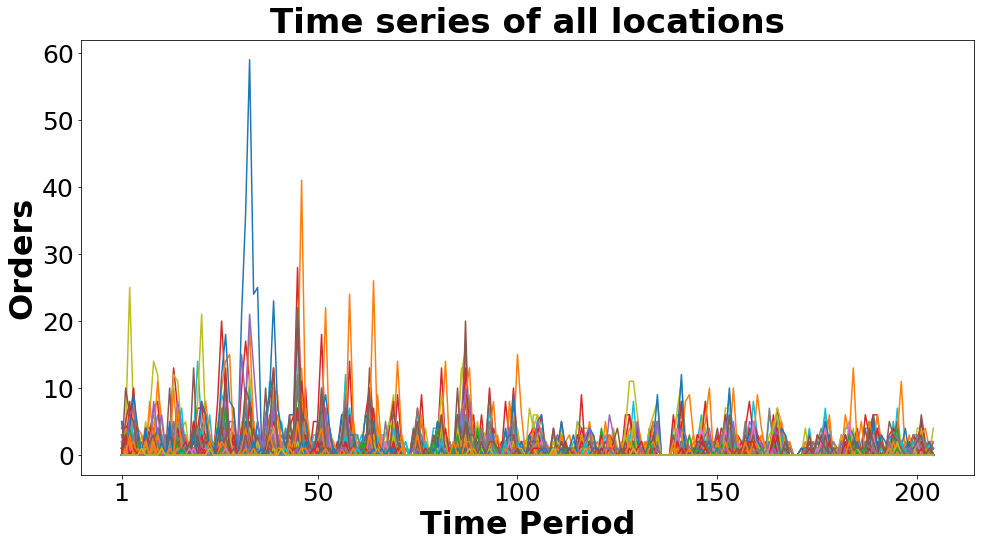

In [42]:
fig, ax = plt.subplots(figsize=(16,8))
#plt.figure(figsize=(12,8))
plt.plot(endo_df.T)
plt.xlabel("Time Period", fontsize = 32, fontweight = 'bold')
plt.ylabel("Orders", fontsize=32, fontweight = 'bold')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
ax.xaxis.set_ticks([0,49,99,149,199])
plt.title("Time series of all locations", fontsize = 34, fontweight = 'bold')
plt.savefig(image_dir + "example_all_ts.jpg")

In [ ]:
plt.plot(endo_df.iloc[65,:])
plt.xticks([0,50,100,150,200])

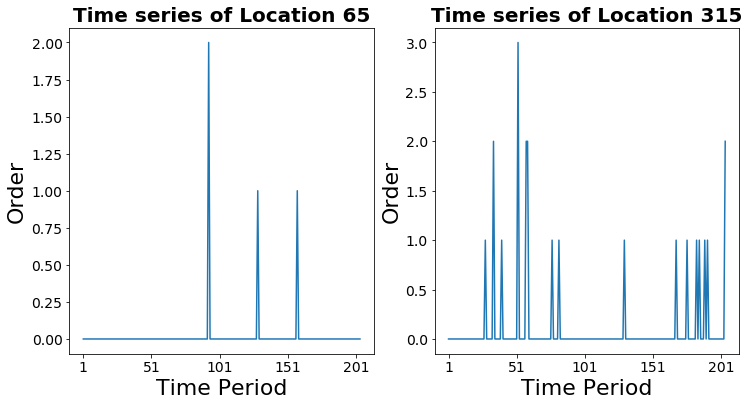

In [27]:
fig, axs = plt.subplots(1,2, figsize=(12, 6))

axs[0].plot(endo_df.iloc[65,:])
axs[0].xaxis.set_ticks([0,50,100,150,200])
#axs[0].yaxis.set_ticks([0,1,2])
axs[0].set_title('Time series of Location 65', fontsize=20, fontweight = 'bold')
axs[1].plot(endo_df.iloc[315,:])
axs[1].xaxis.set_ticks([0,50,100,150,200])
#plt.tick_params(axis='both', which='major', labelsize=18)
#axs[1].yaxis.set_ticks([0,1,2])
axs[1].set_title('Time series of Location 315', fontsize=20, fontweight = 'bold')
#plt.xticks([0,50,100,150,200], fontsize=16)
# for ax in fig.get_axes():
#     ax.label_outer()
#plt.tick_params(axis='both', which='major', labelsize=18)
axs[0].tick_params(axis='x',labelsize=14)
axs[1].tick_params(axis='x',labelsize=14)
axs[0].tick_params(axis='y',labelsize=14)
axs[1].tick_params(axis='y',labelsize=14)
for ax in axs.flat:
    ax.set(xlabel='Time Period', ylabel='Order')
    ax.xaxis.label.set_size(22)
    ax.yaxis.label.set_size(22)
    
plt.savefig(image_dir + "example_ts.jpg")

### **2.1 Mean of each day**

Text(0.5, 1.0, 'Mean Demand of all locations across days')

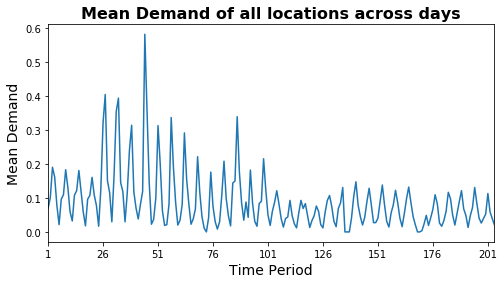

In [5]:
mean_demand = endo_df.mean()
mean_demand.plot(figsize=(8,4))
plt.xlabel("Time Period", fontsize = 14)
plt.ylabel("Mean Demand", fontsize = 14)
plt.title("Mean Demand of all locations across days", fontsize = 16, fontweight = 'bold')

### **2.2 Percentage of locations with low counts of demand**

In [29]:
num_of_non_zeros = (endo_df != 0).sum(axis=1)

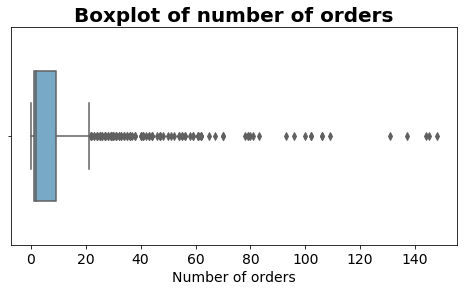

In [33]:
plt.figure(figsize=(8, 4))
sns.boxplot(num_of_non_zeros, width = 0.6, palette="Blues")
plt.xlabel("Number of orders", fontsize = 14)
plt.xticks(fontsize = 14)
plt.title("Boxplot of number of orders", fontsize = 20, fontweight = 'bold')
plt.savefig(image_dir + "boxplot_counts.jpg")

(array([689.,  70.,  33.,  17.,  11.,   6.,   5.,   3.,   1.,   4.]),
 array([  0. ,  14.8,  29.6,  44.4,  59.2,  74. ,  88.8, 103.6, 118.4,
        133.2, 148. ]),
 <a list of 10 Patch objects>)

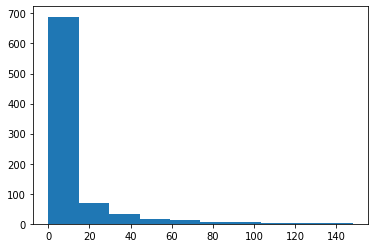

In [8]:
plt.hist(num_of_non_zeros)

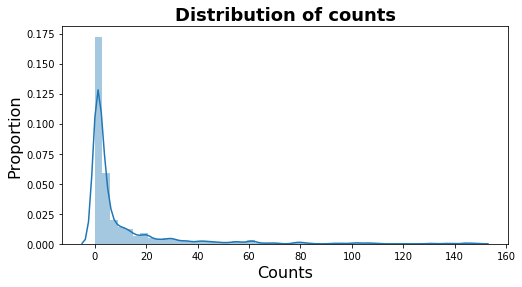

In [9]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.distplot(num_of_non_zeros)
plt.xlabel("Counts", fontsize = 16)
plt.ylabel("Proportion", fontsize = 16)
plt.title("Distribution of counts", fontsize = 18, fontweight = 'bold')
plt.savefig(image_dir + "distplot_counts.jpg")

In [10]:
pd.DataFrame({"Value":num_of_non_zeros.describe(percentiles=[0.95])})

,Value
count,839.000000
mean,9.909416
std,19.564321
min,0.000000
50%,2.000000
95%,48.200000
max,148.000000


We can see that there are alot of locations with very low non-zero demands in total for 2 months. To construct a baseline model, I would just use locations with **at least 50 counts** of data over 2 months only. 

In [11]:
pd.DataFrame(num_of_non_zeros.value_counts(sort = False)).reset_index().rename(columns = {"index": "Number of Non-zero Counts", 0: "Number of locations"}).head()

,Number of Non-zero Counts,Number of locations
0,0,99
1,1,236
2,2,93
3,3,64
4,4,55


## **3. Location analysis**

In [5]:
location_map = pd.read_csv(data_dir + 'location_map.csv')
location_map.head()

,location,lat,long,1,2,3,4,5,6,7,...,195,196,197,198,199,200,201,202,203,204
0,1,0.521564,-1.563594,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0.583427,-1.554834,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0.580670,-1.461984,0,0,1,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
3,4,0.613928,-1.451298,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0.392669,-1.449283,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
loc_with_demand = location_map
for i in range(location_map.shape[0]):
    location_map.loc[i, "Total_Demand"] = df.iloc[location_map.loc[i, "location"],:].sum()

In [27]:
location_map = location_map.sort_values(by = 'Mean_Demand')
location_map.tail()

,location,lat,long,Mean_Demand,Total_Demand
666,58,1.451747,-1.035048,2.774510,566.0
602,43,0.538452,-1.092948,2.970588,606.0
294,680,-1.005535,0.824935,3.161765,645.0
701,511,1.162422,0.223423,3.348039,683.0
170,839,-0.790824,2.680801,27.500000,5610.0


In [31]:
def plt_heat_map(latitudes, longitudes, demand, title):
    fig = plt.figure(figsize=(14,8))
    plt.scatter(latitudes, longitudes, c=demand, cmap='Blues')
    plt.colorbar()
    plt.title(title,fontsize=16, fontweight='bold')
    plt.xlabel('Latitude', fontsize=16)
    plt.ylabel('Longitude', fontsize=16)
    plt.show()

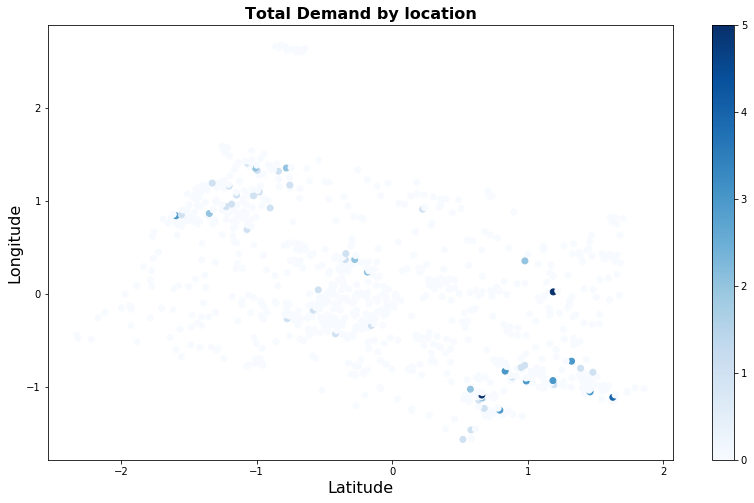

In [33]:
latitude = location_map['lat'][:-1]
longitude = location_map['long'][:-1]
demand = location_map['50'][:-1]
plt_heat_map(latitude, longitude, demand, 'Total Demand by location')

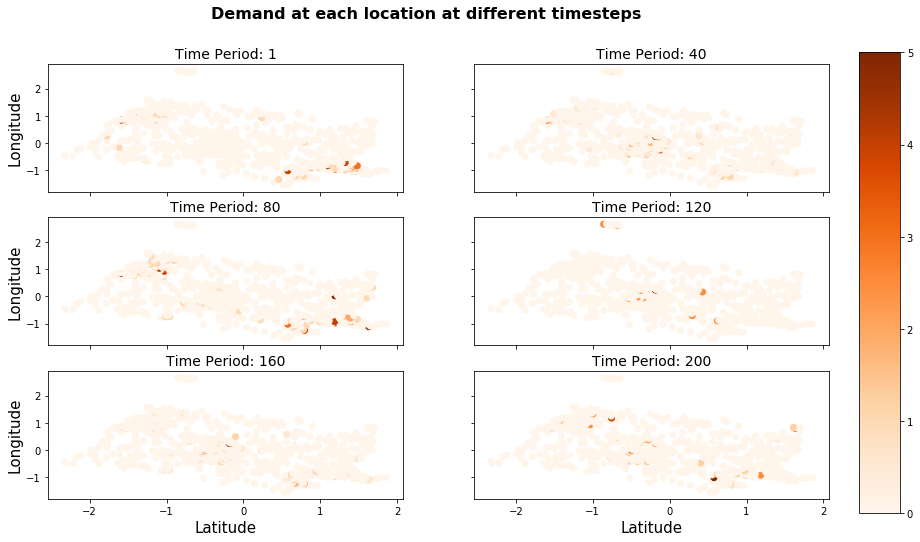

In [173]:
cmap = 'Oranges' #'cool'  #'RdPu' 
fig, axs = plt.subplots(3, 2, figsize=(14,8))
latitude = location_map['lat'][:-1]
longitude = location_map['long'][:-1]
demand = location_map['1'][:-1]
demand1 = location_map['40'][:-1]
demand2 = location_map['80'][:-1]
demand3 = location_map['120'][:-1]
demand4 = location_map['160'][:-1]
demand5 = location_map['200'][:-1]
im = axs[0, 0].scatter(latitude, longitude, c=demand, cmap=cmap)
axs[0, 0].set_title('Time Period: 1', fontsize=14)
axs[0, 1].scatter(latitude, longitude, c=demand1, cmap=cmap)
axs[0, 1].set_title('Time Period: 40', fontsize=14)
axs[1, 0].scatter(latitude, longitude, c=demand2, cmap=cmap)
axs[1, 0].set_title('Time Period: 80', fontsize=14)
axs[1, 1].scatter(latitude, longitude, c=demand3, cmap=cmap)
axs[1, 1].set_title('Time Period: 120', fontsize=14)
axs[2, 0].scatter(latitude, longitude, c=demand4, cmap=cmap)
axs[2, 0].set_title('Time Period: 160', fontsize=14)
axs[2, 1].scatter(latitude, longitude, c=demand5, cmap=cmap)
axs[2, 1].set_title('Time Period: 200', fontsize=14)
fig.suptitle('Demand at each location at different timesteps',fontsize=16, fontweight='bold')
for ax in axs.flat:
    ax.set(xlabel='Latitude', ylabel='Longitude')
    ax.xaxis.label.set_size(15)
    ax.yaxis.label.set_size(15)
for ax in fig.get_axes():
    ax.label_outer()
cb_ax = fig.add_axes([0.93, 0.1, 0.04, 0.8])
cbar = fig.colorbar(im,cax=cb_ax)
plt.show()
fig.savefig(image_dir + "spatial_demand.jpg")

## **4. Exploratory Analysis on exogenous data: Weather/Rainfall**

In [13]:
weather_df = pd.read_csv(data_dir + "time.csv")

In [14]:
weather_df.head()

,date,weekday,Temperature (degrees),Wind (KM/hr),Gust (KM/hr),Cloud (%),Humidity (%),Precipitation (mm),Pressure (mb)
0,08/10/15,Monday,27,29,48,84,87,0.0,1004
1,08/10/15,Monday,27,29,48,84,87,0.0,1004
2,08/10/15,Monday,27,29,48,84,87,0.0,1004
3,08/10/15,Monday,27,29,48,84,87,0.0,1004
4,08/10/15,Monday,27,29,48,84,87,0.0,1004


In [15]:
weather_df.describe()

,Temperature (degrees),Wind (KM/hr),Gust (KM/hr),Cloud (%),Humidity (%),Precipitation (mm),Pressure (mb)
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,27.500000,13.764706,17.941176,57.588235,66.147059,0.085294,1009.970588
std,2.347832,7.298257,11.718222,32.344925,11.881514,0.491183,4.071905
min,21.000000,4.000000,4.000000,6.000000,46.000000,0.000000,1001.000000
25%,27.000000,8.000000,10.000000,27.000000,58.000000,0.000000,1007.000000
50%,28.000000,12.500000,14.500000,54.000000,64.000000,0.000000,1009.500000
75%,29.000000,20.000000,23.000000,94.000000,73.000000,0.000000,1013.000000
max,31.000000,30.000000,48.000000,100.000000,92.000000,2.900000,1018.000000


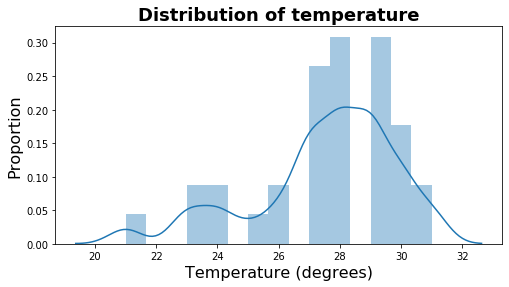

In [16]:
dist_plot(weather_df['Temperature (degrees)'], "Temperature (degrees)", "Proportion", "Distribution of temperature", 'distplot_temp')

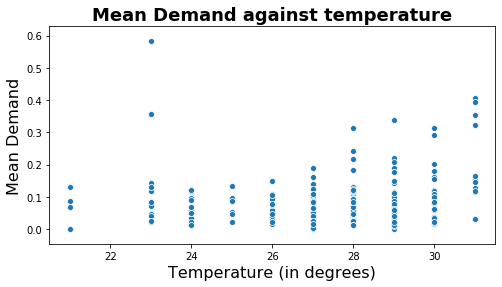

In [17]:
# Plot of temperature against mean demand
plot_scatter(weather_df['Temperature (degrees)'].values, mean_demand.values, "Temperature (in degrees)", "Mean Demand", "Mean Demand against temperature", "temp_mean_demand.jpg")

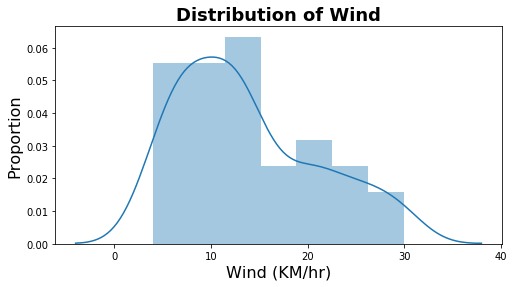

In [18]:
dist_plot(weather_df['Wind (KM/hr)'], "Wind (KM/hr)", "Proportion", "Distribution of Wind", 'distplot_wind')

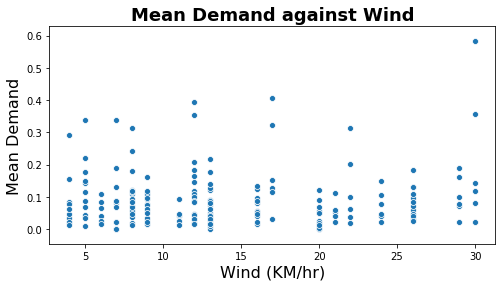

In [19]:
plot_scatter(weather_df['Wind (KM/hr)'].values, mean_demand.values, "Wind (KM/hr)", "Mean Demand", "Mean Demand against Wind", "wind_mean_demand.jpg")

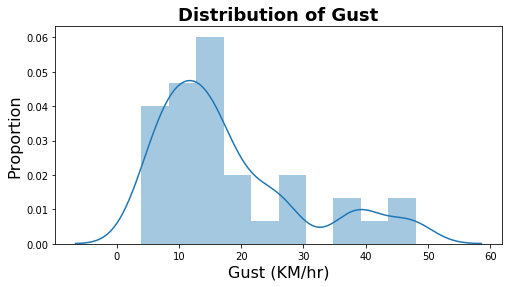

In [20]:
dist_plot(weather_df['Gust (KM/hr)'], "Gust (KM/hr)", "Proportion", "Distribution of Gust", 'distplot_gust')

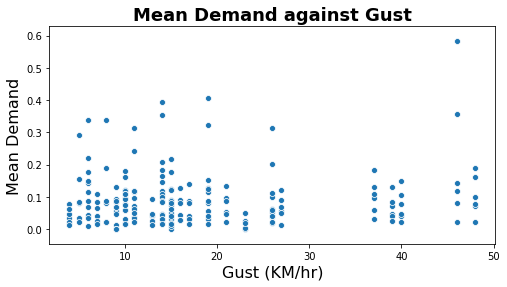

In [21]:
plot_scatter(weather_df['Gust (KM/hr)'].values, mean_demand.values, "Gust (KM/hr)", "Mean Demand", "Mean Demand against Gust", "gust_mean_demand.jpg")

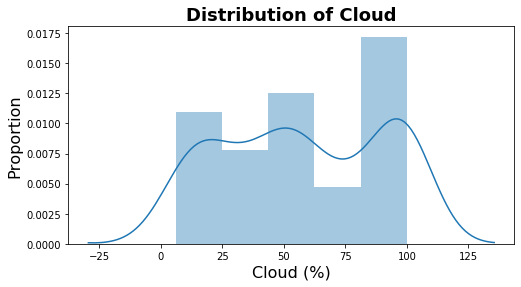

In [22]:
dist_plot(weather_df['Cloud (%)'], "Cloud (%)", "Proportion", "Distribution of Cloud", 'distplot_cloud')

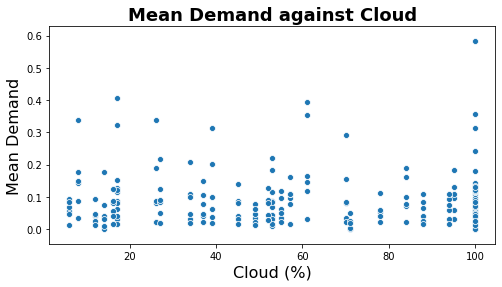

In [23]:
plot_scatter(weather_df['Cloud (%)'].values, mean_demand.values, "Cloud (%)", "Mean Demand", "Mean Demand against Cloud", "cloud_mean_demand.jpg")

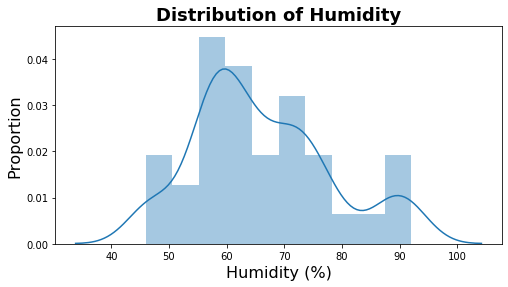

In [24]:
dist_plot(weather_df['Humidity (%)'], "Humidity (%)", "Proportion", "Distribution of Humidity", 'distplot_humidity')

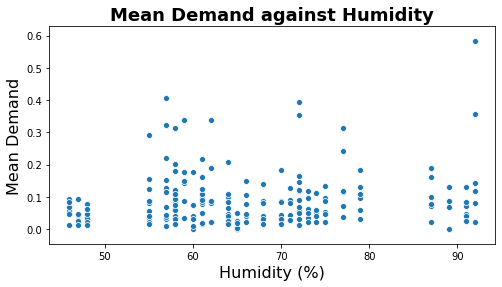

In [25]:
plot_scatter(weather_df['Humidity (%)'].values, mean_demand.values, "Humidity (%)", "Mean Demand", "Mean Demand against Humidity", "humidity_mean_demand.jpg")

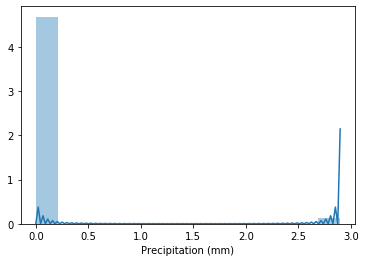

In [13]:
dist_plot(weather_df['Precipitation (mm)'], "Precipitation (mm)", "Proportion", "Distribution of Precipitation", 'distplot_prec')

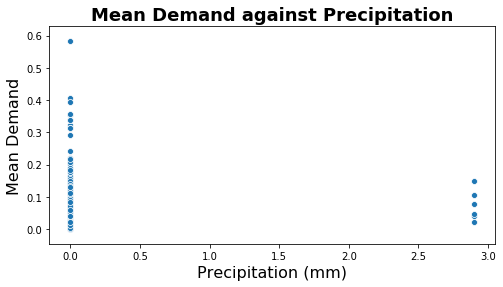

In [27]:
plot_scatter(weather_df['Precipitation (mm)'].values, mean_demand.values, "Precipitation (mm)", "Mean Demand", "Mean Demand against Precipitation", "prec_mean_demand.jpg")

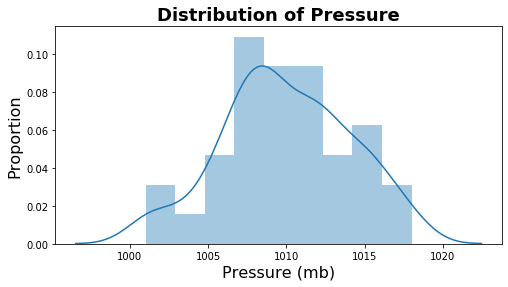

In [28]:
dist_plot(weather_df['Pressure (mb)'], "Pressure (mb)", "Proportion", "Distribution of Pressure", 'distplot_pressure')

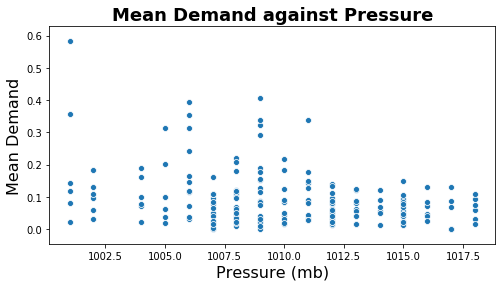

In [29]:
plot_scatter(weather_df['Pressure (mb)'].values, mean_demand.values, "Pressure (mb)", "Mean Demand", "Mean Demand against Pressure", "pressure_mean_demand.jpg")

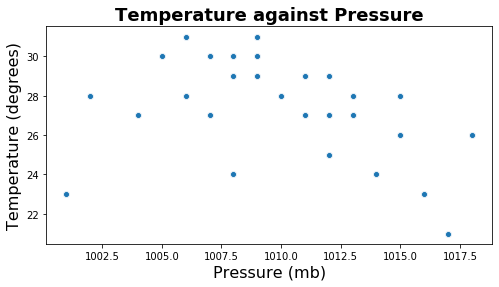

In [30]:
plot_scatter(weather_df['Pressure (mb)'].values, weather_df['Temperature (degrees)'].values, "Pressure (mb)", "Temperature (degrees)", "Temperature against Pressure", "pressure_tenp.jpg")